In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image #python image library-for image open etc.
import tensorflow
from keras.applications.vgg16 import VGG16 #the transfer learning model to be used 
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Sequential #these required for building our model
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import load_img, img_to_array #for images
import h5py
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [3]:
train_files_path="/Users/halilbugday/Desktop/CENG_316project/train/"
test_files_path="/Users/halilbugday/Desktop/CENG_316project/test/"
img=load_img(test_files_path + "daisy/dene.jpg") #is the path correct?

In [4]:
print(img_to_array(img).shape) #about an img

(240, 231, 3)


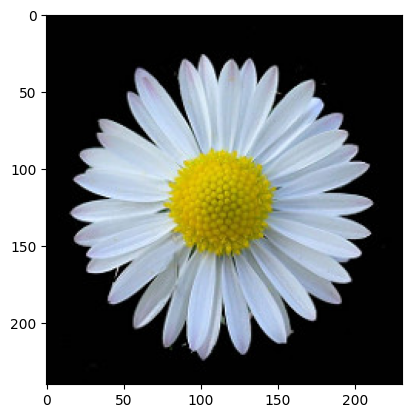

In [5]:
plt.imshow(img)
plt.show() #yeah baby

In [6]:
#building our train and test datasets from direc. (224 fotoğrafların tekrar size olması VGG16 bunu kullanıyor)
train_data = ImageDataGenerator().flow_from_directory(train_files_path, target_size= (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path, target_size= (224,224))


Found 4217 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [20]:
numberOfFlowerTypes = 5 #if you have added other flower types then you increase the number

In [29]:
vgg=VGG16(weights="vgg16_weights.h5") #build our model object (.h5 sıkıntı çıkardı incele)

In [30]:
vgg_layers = vgg.layers
print(vgg_layers) #lets look the layers

[<keras.engine.input_layer.InputLayer object at 0x155c74490>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155c86090>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155c84b10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x155cda810>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155c69190>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155cdae50>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x155aba110>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155c68d50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155c163d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155c6c7d0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x155ae8450>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155cf3d10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155d4f450>, <keras.layers.convolutional.conv2d.Conv2D object at 0x155d571d0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 

In [31]:
vggmodel_layersize_tobe_used = len(vgg_layers) -1 #son layer output onu kullanmayalım (16 layer + 1 output layer)
model = Sequential() #kendi modelimizi oluşturalım (boş bir model)
for i in range (vggmodel_layersize_tobe_used): #(içini layerlar ile doldur)
    model.add(vgg_layers[i])



In [32]:
for layers in model.layers:
    layers.trainable = False #since I dont want to re-train all the orginal 16 layers of vgg16 (vgg 16nın layerlarını train ETME!)
#yoksa 138 million image train etmeye çalışabilirsin :)
#ama altta son eklediğimiz train olcak

model.add(Dense(numberOfFlowerTypes, activation="softmax")) #output layer'na kendi output'umu ekledim son katman eklendi (numberOfFlowe-> nöron sayısı)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [33]:
#compile etme zamanı
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [34]:
batch_size = 4 
model.fit_generator(train_data,
                    steps_per_epoch=400//batch_size,
                    epochs= 3, #you can increase if your comp. good baby :) (norm=3)
                    validation_data=test_data, #test fotolarının basarısını hesapla
                    validation_steps=200//batch_size)

/var/folders/jc/gzg7n3p10vg6ks7jzjmmrmbh0000gn/T/ipykernel_16563/1521063863.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,


Epoch 1/3
100/100 [==============================] - 1107s 11s/step - loss: 0.8830 - accuracy: 0.7388 - val_loss: 1.1079 - val_accuracy: 0.7500
Epoch 2/3
100/100 [==============================] - 1086s 11s/step - loss: 0.5242 - accuracy: 0.8299
Epoch 3/3
100/100 [==============================] - 1069s 11s/step - loss: 0.3887 - accuracy: 0.8700


In [50]:
#bir resim load edelim
img = Image.open("ay1.jpeg").resize((224,224))

In [51]:
#convert it to array
img = np.array(img)

In [52]:
img.shape #control shape

(224, 224, 3)

In [53]:
#model 4 boyutta çalıştığı için extra bir boyut eklemeliyiz
img = img.reshape(-1,224,224,3)

In [54]:
#control
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [55]:
#scale input pixels between -1 and 1 using model's preprocess input
img=preprocess_input(img)

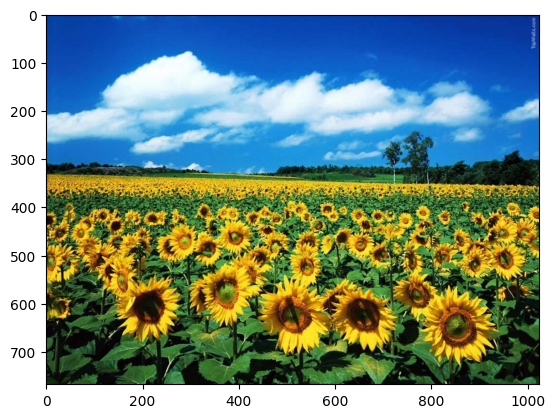

In [56]:
#let's see the flower
img_for_display = load_img("ay1.jpeg")
plt.imshow(img_for_display)
plt.show()

In [57]:
#let's see contents of prediction
preds = model.predict(img)

1/1 [==============================] - 0s 382ms/step


In [58]:
preds

array([[0.00146509, 0.00189548, 0.00151846, 0.82258755, 0.17253338]],
      dtype=float32)

In [59]:
image_classes = ["daisy-papatya","dandelion-karahindiba","rose-gül","sunflower-ayçiçeği","lale"]
result = np.argmax(preds[0])
print(image_classes[result])

sunflower-ayçiçeği
